# **Taller 2 - Servicios inmobiliarios**

### **Integrantes:**
- María Alejandra Pérez Petro - 201923972
- Daniel Esteban Aguilera Figueroa - 202010592 

### Librerias

Se importan las librerías necesarias para el análisis de los datos.

In [532]:
import numpy as np
import pandas as pd
    
# visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

# estadisticas
from scipy.stats import chi2_contingency, pearsonr, ttest_ind, f_oneway
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [533]:
%matplotlib inline

In [534]:
pd.set_option('display.float_format', '{:.2f}'.format)  # 2 decimales, sin notación científica


# **1. Entendimiento de los datos**
En esta sección se cargan los datos presentados en el archivo `apartamentos.csv`, se revisan las dimensiones y se seleccionan las caracteristicas a analizar.

Se cargan los datos

In [535]:
apartamentos_df: pd.DataFrame = pd.read_csv("./data/apartamentos.csv")

Se revisan las dimensiones del dataset. Este cuenta con 46 columnas y 43013 filas

In [536]:
apartamentos_df.shape

(43013, 46)

Se listan los atributos (columnas) del dataset y sus tipos

In [537]:
apartamentos_df.dtypes

_id                         object
codigo                      object
tipo_propiedad              object
tipo_operacion              object
precio_venta               float64
area                       float64
habitaciones               float64
banos                      float64
administracion             float64
parqueaderos               float64
sector                      object
estrato                    float64
antiguedad                  object
latitud                    float64
longitud                   float64
direccion                   object
descripcion                 object
website                     object
last_view                   object
datetime                    object
url                         object
timeline                    object
estado                      object
compañia                    object
precio_arriendo            float64
jacuzzi                    float64
piso                       float64
closets                    float64
chimenea            

se muestran las primeras filas para entender la estructura de los datos

In [538]:
apartamentos_df.head()

,_id,codigo,tipo_propiedad,tipo_operacion,precio_venta,area,habitaciones,banos,administracion,parqueaderos,...,vigilancia,coords_modified,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m,is_cerca_estacion_tm,parque_cercano,distancia_parque_m,is_cerca_parque
0,66d86c7eceda690e85508760,4133491,APARTAMENTO,VENTA,339000000.00,76.00,3.00,2.00,300000.00,1.00,...,0.00,False,SUBA,URB. PICADELLY,Toberin - Foundever,1142.45,0,PARQUE VECINAL DESARROLLO CANTALEJO URBANIZACI...,426.09,1
1,66d86c7eceda690e85508761,3889852,APARTAMENTO,VENTA,223000000.00,63.00,3.00,2.00,NaN,0.00,...,0.00,False,USAQUEN,BARRANCAS PERLAS DEL NORTE,Mazurén,2384.89,0,PARQUE ZONAL ALTA BLANCA,472.47,1
2,66d86c7eceda690e85508762,4386770,APARTAMENTO,VENTA,440898168.00,54.00,3.00,2.00,305000.00,0.00,...,0.00,False,LOS MARTIRES,SAN VICTORINO,De La Sabana,232.22,1,PARQUE METROPOLITANO TERCER MILENIO,961.29,0
3,66d86c7eceda690e85508763,4210060,APARTAMENTO,VENTA,158000000.00,43.00,2.00,2.00,106600.00,0.00,...,0.00,False,SUBA,LA ESTRELLA II,Portal Suba,2275.08,0,PARQUE ZONAL LA GAITANA,539.98,0
4,66d86c7eceda690e85508764,4063762,APARTAMENTO,VENTA,222800000.00,48.00,3.00,2.00,151000.00,0.00,...,0.00,False,USAQUEN,HORIZONTES USAQUEN,Terminal,2099.16,0,PARQUE VECINAL DESARROLLO VERBENAL I,1661.14,0


De igual manera, se hace un profilling general para una mejor revisión de todas las variables

In [539]:
# from ydata_profiling import ProfileReport 
# profile = ProfileReport(apartamentos_df)

In [540]:
# profile.to_file('data/report.html')

## Top 10 atributos más importantes para el análisis

Considerando el funcionamiento del mercado inmobiliario bogotano, el objetivo de HabitAlpes de construir un modelo de estimación de precios confiable y los determinantes clásicos del valor de vivienda, se identifican los siguientes 10 atributos como los más relevantes para predecir el precio de venta de un apartamento:

1. `area`: Superficie total del apartamento en metros cuadrados. Es el predictor más influyente del precio porque refleja directamente el tamaño del activo. A mayor área, mayor precio absoluto, con variaciones según sector y estrato.

2. `habitaciones`: Cantidad de habitaciones disponibles. Este atributo determina la distribución interna y el potencial de uso del inmueble.

3. `banos`: Número total de baños. Está altamente correlacionado con el nivel de comodidad y el estándar del apartamento.

4. `estrato`: Clasificación socioeconómica (1 a 6).

5. `barrio`: Ubicación específica del inmueble.

6. `sector`: Zona general donde se ubica el apartamento.

7. `localidad`: División administrativa de Bogotá.

8. `parqueaderos`: Número de parqueaderos asignados.
9. `piso`: Nivel dentro del edificio en el que se ubica el apartamento.

10. `antiguedad`: Edad del inmueble. Los apartamentos más nuevos tienden a ser más costosos debido a mejores especificaciones, materiales más recientes y menor desgaste.

# **2. Calidad de los datos**

En esta sección se analiza la calidad de los datos de las variables seleccionadas. Sin embargo, a la hora de la creación del modelo es posible realizar una selección de variables más robusta con el fin de mejorar el modelo.

In [541]:
# Análisis de valores nulos en variables clave
vars_analisis = ['area', 'habitaciones', 'banos', 'parqueaderos', 'piso', 'antiguedad', 
                 'sector', 'localidad', 'barrio', 'estrato', 'precio_venta']

Creación de un nuevo dataframe donde guardaremos la versión limpia de los datos

In [542]:
df_clean = apartamentos_df.copy()

### **2.1. Completitud de los datos**

In [543]:
#Revisamos valores nulos sobre todo el dataset
display(apartamentos_df.isna().sum().sort_values(ascending=False))
numero_filas_con_nulos = apartamentos_df.isna().any(axis=1).sum()
print(f"Número de filas con al menos un valor nulo: {numero_filas_con_nulos}, lo que representa el {numero_filas_con_nulos / apartamentos_df.shape[0] * 100:.2f}% del total de filas.")


closets                    43013
piso                       43013
url                        42219
direccion                  42219
precio_arriendo            27184
precio_venta               15429
timeline                   13586
administracion              7925
compañia                    4530
sector                      1641
estado                       796
barrio                       193
antiguedad                    10
website                        2
salon_comunal                  2
terraza                        2
conjunto_cerrado               2
ascensor                       2
vigilancia                     2
piscina                        2
gimnasio                       2
datetime                       2
chimenea                       2
permite_mascotas               2
last_view                      2
jacuzzi                        2
parqueaderos                   1
habitaciones                   1
banos                          1
estrato                        1
latitud   

Número de filas con al menos un valor nulo: 43013, lo que representa el 100.00% del total de filas.


In [544]:
# Revisamos valores nulos en variables clave
nulos_df = pd.DataFrame({
    'Variable': vars_analisis,
    'Valores Nulos': [apartamentos_df[var].isnull().sum() for var in vars_analisis],
    'Porcentaje': [(apartamentos_df[var].isnull().sum() / len(apartamentos_df)) * 100 for var in vars_analisis]
})

nulos_df = nulos_df.sort_values('Porcentaje', ascending=False)

print("="*70)
print("ANÁLISIS DE VALORES NULOS")
print("="*70)
print(nulos_df.to_string(index=False))
print("="*70)

ANÁLISIS DE VALORES NULOS
    Variable  Valores Nulos  Porcentaje
        piso          43013      100.00
precio_venta          15429       35.87
      sector           1641        3.82
      barrio            193        0.45
  antiguedad             10        0.02
habitaciones              1        0.00
       banos              1        0.00
     estrato              1        0.00
parqueaderos              1        0.00
        area              0        0.00
   localidad              0        0.00


**Observaciones sobre la completitud de los datos:**
- La variable **`piso`** tiene 100% de valores nulos (43,013), lo que indica que esta información no está disponible en el dataset. Se descarta su uso para análisis futuros.
- **`precio_venta`** tiene 35.9% de valores nulos, lo cual es significativo para análisis de precios. Como está es la variable objetivo, se debe considerar su imputación o exclusión de filas.
- **`sector`** presenta 3.8% de valores nulos
- Variables como `area`, `habitaciones`, `banos`, `parqueaderos`, y `estrato` tienen <0.01% nulos

### **2.2. Unicidad de los datos**

In [545]:
# Revisamos duplicados sobre todo el dataset
num_duplicados = apartamentos_df.duplicated().sum()
print(f"Número de duplicados: {num_duplicados} (%{num_duplicados/len(apartamentos_df)*100:.2f})")

Número de duplicados: 0 (%0.00)


### **2.3. Consistencia de los datos**

Se procede a analizar la consistencia de las variables númericas y categóricas seleccionadas. Para las variables númericas se analizan estadísticas descriptivas y distribuciones, mientras que para las categóricas se revisan frecuencias y valores únicos.

## **Variables Numéricas**

In [546]:
vars_numericas = ['area', 'habitaciones', 'banos', 'parqueaderos', 'estrato', 'precio_venta']

#### Estadísticas Descriptivas - Variables Numérica

In [547]:

apartamentos_df[vars_numericas].describe().T

,count,mean,std,min,25%,50%,75%,max
area,43013.00,180.03,9163.00,0.00,63.00,100.00,174.00,1900000.00
habitaciones,43012.00,2.62,0.85,1.00,2.00,3.00,3.00,7.00
banos,43012.00,2.70,1.20,0.00,2.00,3.00,4.00,6.00
parqueaderos,43012.00,1.66,1.11,-2.00,1.00,2.00,2.00,30.00
estrato,43012.00,4.84,1.24,0.00,4.00,5.00,6.00,6.00
precio_venta,27584.00,2364794142.84,55741976390.87,1000000.00,402900000.00,700000000.00,1330000000.00,4250000000000.00


**Área (m²)**
- **Media:** 180 m²
- **Mediana:** 100 m²  
- **Rango:** 0 - 1,900,000 m² (valores extremos sugieren outliers o errores)

In [548]:
apartamentos_df["area"].value_counts().sort_index()

area
0.00          19
1.00           8
2.00           3
4.93           1
5.00           1
              ..
9999.00        1
13985.00       1
15413.00       1
19621.00       1
1900000.00     1
Name: count, Length: 4494, dtype: int64

Un apartamento con area 0 metros cuadrados no es realista. En general, un área por debajo de 10 m² es inviable para un apartamento. Por suparte un area 1.900.000 de metros cuadrados también es poco realista. Procedemos a filtrar estos valores.

In [549]:
# Cálculo de límite usando SIEMPRE los datos originales
upper_area = apartamentos_df["area"].quantile(0.99)

# Filtro aplicado a df_clean, pero con límite del original
df_clean = df_clean[(df_clean["area"] > 10) & (df_clean["area"] < upper_area)]

 **Estrato**
- **Media:** 4.8
- **Rango:** 0-6

En Bogotá no hay apartamentos de estrato 0. Eliminamos esos registros. Los valores validos de estrato son 1 a 6. 

In [550]:
filtro_estrato = df_clean['estrato'].isin([1, 2, 3, 4, 5, 6])
df_clean = df_clean[filtro_estrato]

**Parqueaderos**
- **Media:** 1.66 parqueaderos
- **Rango:** -2 a 30 parqueaderos

In [551]:
apartamentos_df["parqueaderos"].value_counts().sort_index()

parqueaderos
-2.00        1
0.00      6615
1.00     12678
2.00     15525
3.00      5045
4.00      3143
10.00        2
20.00        2
30.00        1
Name: count, dtype: int64

No es razonable valores negativos para parqueaderos, ni un número tan alto como 30 para un apartamento/casa. Se toma la decisión de eliminar los valores negativos y aquellos que superen 10 parqueaderos, ya que no es común que un apartamento tenga más de 10 parqueaderos asignados.

In [552]:
filter_parqueaderos = (df_clean["parqueaderos"] >= 0) & (df_clean["parqueaderos"] <= 10)
df_clean = df_clean[filter_parqueaderos]

**Habitaciones**
- **Media:** 2.6 habitaciones
- **Rango:** 1-7 habitaciones

 **Baños**
- **Media:** 1.8 baños
- **Rango:** 1-7 baños


 **Precio de Venta**
- **Media:** $2,364,794,000 COP (~2.36 mil millones)
- **Mediana:** $700,000,000 COP
- Gran diferencia entre media y mediana indica presencia de propiedades de muy alto valor

In [553]:
# Eliminamos filas con valores nulos en 'precio_venta' ya que es la variable objetivo principal
filtro_precio = (df_clean["precio_venta"] > 0) & (df_clean["precio_venta"] < 5e9) & (df_clean["precio_venta"].notnull())
df_clean = df_clean[filtro_precio].reset_index(drop=True)

#### Histograma de variables númericas

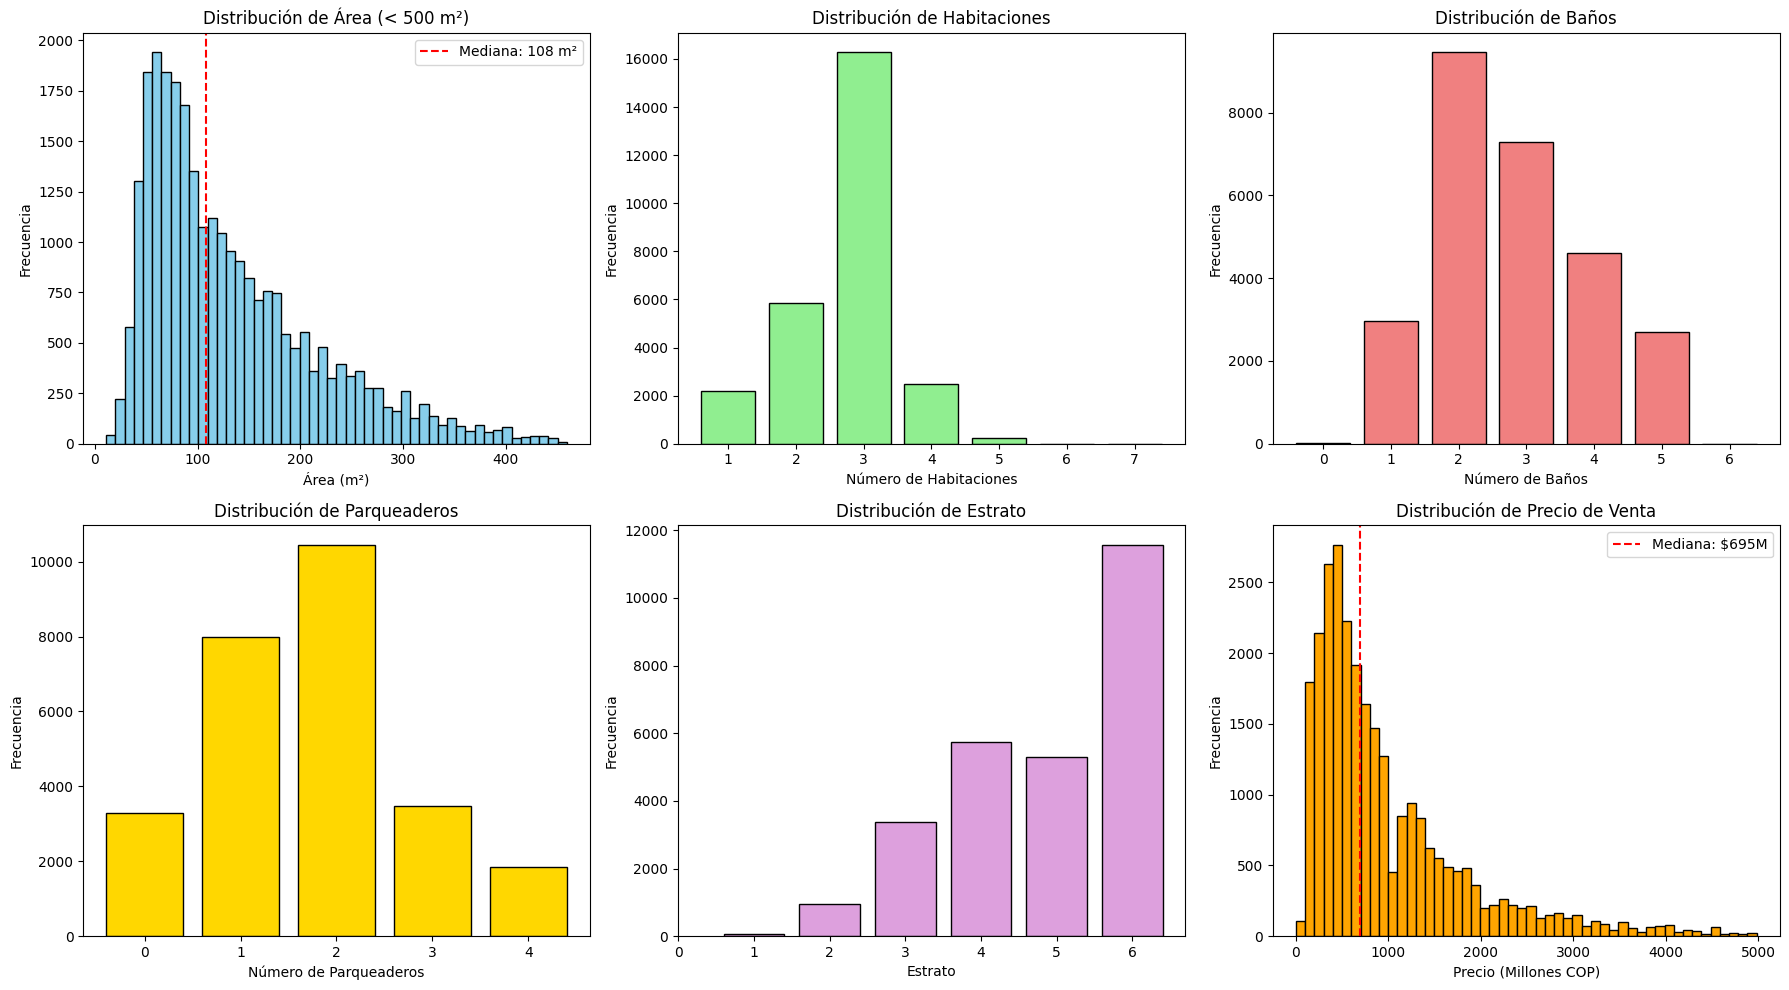

In [554]:
# Visualización de distribuciones
df_plot = df_clean.copy()
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. Área (filtrada para mejor visualización)
axes[0, 0].hist(df_plot['area'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribución de Área (< 500 m²)')
axes[0, 0].set_xlabel('Área (m²)')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].axvline(df_plot['area'].median(), color='red', linestyle='--', label=f'Mediana: {df_plot["area"].median():.0f} m²')
axes[0, 0].legend()

# 2. Habitaciones
habitaciones_counts = df_plot['habitaciones'].value_counts().sort_index()
axes[0, 1].bar(habitaciones_counts.index, habitaciones_counts.values, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Distribución de Habitaciones')
axes[0, 1].set_xlabel('Número de Habitaciones')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_xticks(range(1, 8))

# 3. Baños
banos_counts = df_plot['banos'].value_counts().sort_index()
axes[0, 2].bar(banos_counts.index, banos_counts.values, color='lightcoral', edgecolor='black')
axes[0, 2].set_title('Distribución de Baños')
axes[0, 2].set_xlabel('Número de Baños')
axes[0, 2].set_ylabel('Frecuencia')

# 4. Parqueaderos
parqueaderos_counts = df_plot['parqueaderos'].value_counts().sort_index()
axes[1, 0].bar(parqueaderos_counts.index, parqueaderos_counts.values, color='gold', edgecolor='black')
axes[1, 0].set_title('Distribución de Parqueaderos')
axes[1, 0].set_xlabel('Número de Parqueaderos')
axes[1, 0].set_ylabel('Frecuencia')

# 5. Estrato
estrato_counts = df_plot['estrato'].value_counts().sort_index()
axes[1, 1].bar(estrato_counts.index, estrato_counts.values, color='plum', edgecolor='black')
axes[1, 1].set_title('Distribución de Estrato')
axes[1, 1].set_xlabel('Estrato')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].set_xticks(range(0, 7))

# 6. Precio de Venta (log scale para mejor visualización)
axes[1, 2].hist(df_plot['precio_venta'] / 1e6, bins=50, color='orange', edgecolor='black')
axes[1, 2].set_title('Distribución de Precio de Venta')
axes[1, 2].set_xlabel('Precio (Millones COP)')
axes[1, 2].set_ylabel('Frecuencia')
axes[1, 2].axvline(df_plot['precio_venta'].median() / 1e6, color='red', linestyle='--', 
                    label=f'Mediana: ${df_plot["precio_venta"].median()/1e6:.0f}M')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

#### Boxplots de variables númericas

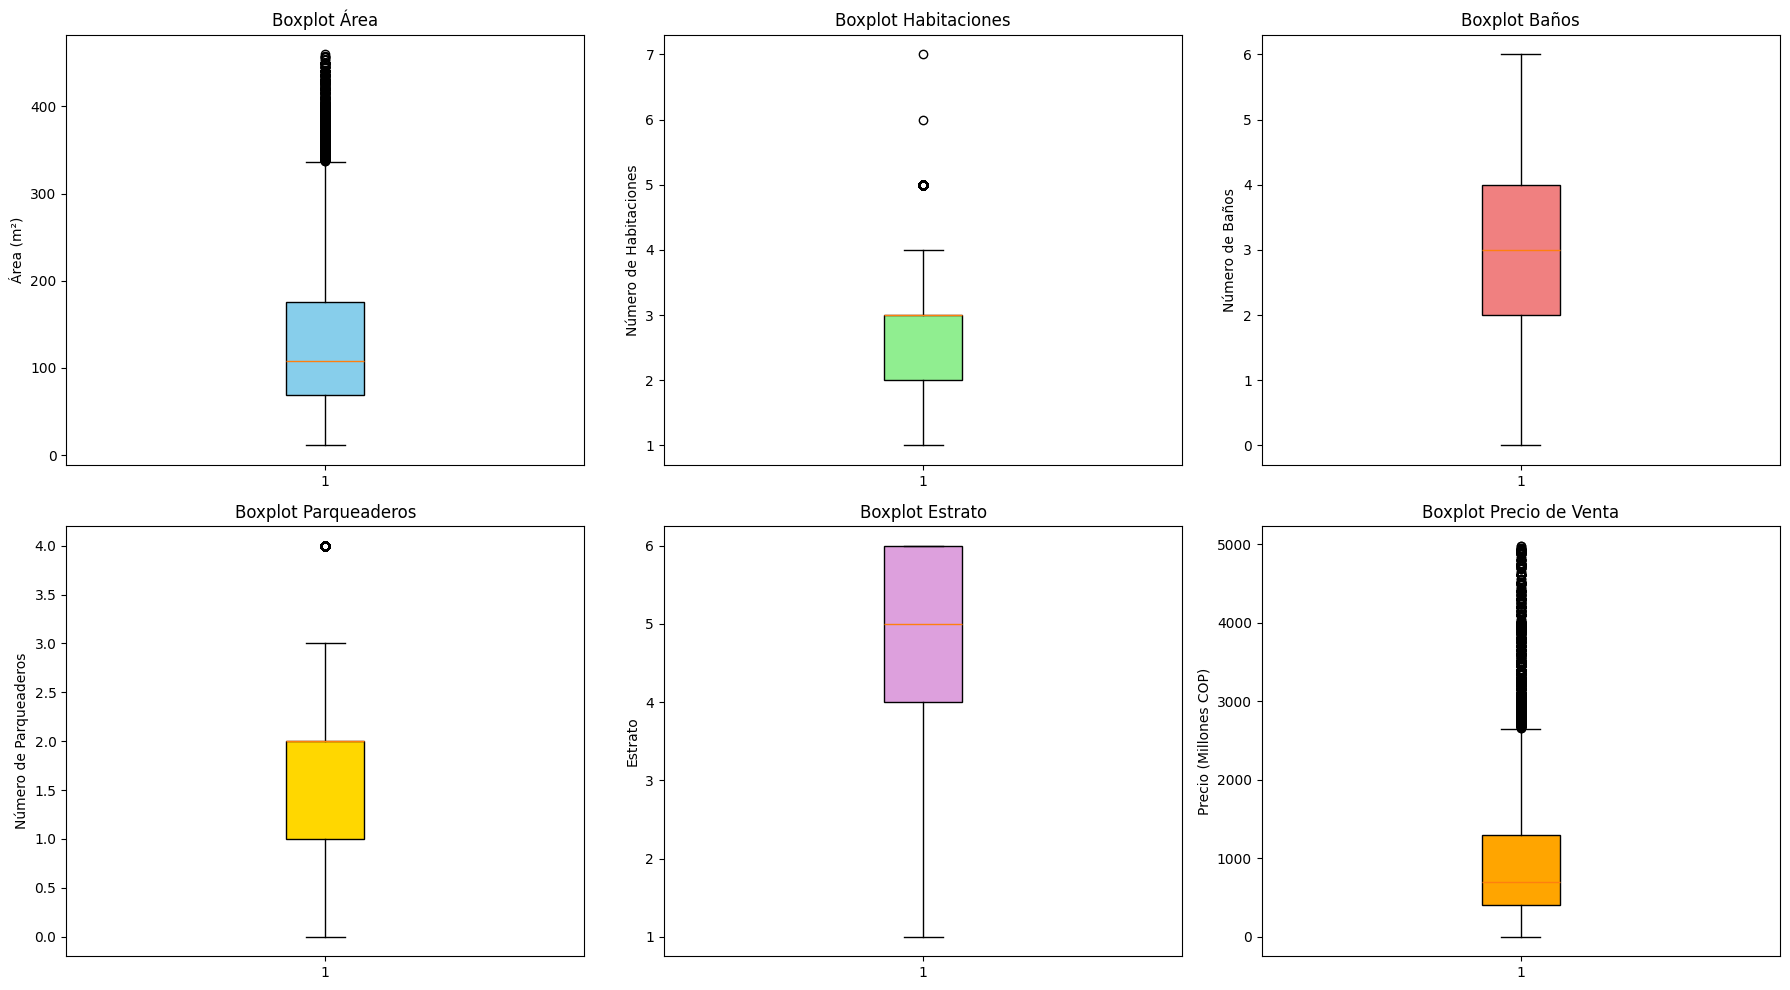

In [555]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
df_plot = df_clean.copy()
# 1. Área 
axes[0, 0].boxplot(df_plot['area'], vert=True, patch_artist=True, boxprops=dict(facecolor='skyblue'))
axes[0, 0].set_title('Boxplot Área')
axes[0, 0].set_ylabel('Área (m²)')

# 2. Habitaciones
axes[0, 1].boxplot(df_plot['habitaciones'].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
axes[0, 1].set_title('Boxplot Habitaciones')
axes[0, 1].set_ylabel('Número de Habitaciones')

# 3. Baños
axes[0, 2].boxplot(df_plot['banos'].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
axes[0, 2].set_title('Boxplot Baños')
axes[0, 2].set_ylabel('Número de Baños')

# 4. Parqueaderos
axes[1, 0].boxplot(df_plot['parqueaderos'].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor='gold'))
axes[1, 0].set_title('Boxplot Parqueaderos')
axes[1, 0].set_ylabel('Número de Parqueaderos')

# 5. Estrato
axes[1, 1].boxplot(df_plot['estrato'].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor='plum'))
axes[1, 1].set_title('Boxplot Estrato')
axes[1, 1].set_ylabel('Estrato')

# 6. Precio de Venta 
axes[1, 2].boxplot(df_plot['precio_venta'] / 1e6, vert=True, patch_artist=True, boxprops=dict(facecolor='orange'))
axes[1, 2].set_title('Boxplot Precio de Venta')
axes[1, 2].set_ylabel('Precio (Millones COP)')

plt.tight_layout()
plt.show()

## **Variables Categóricas**

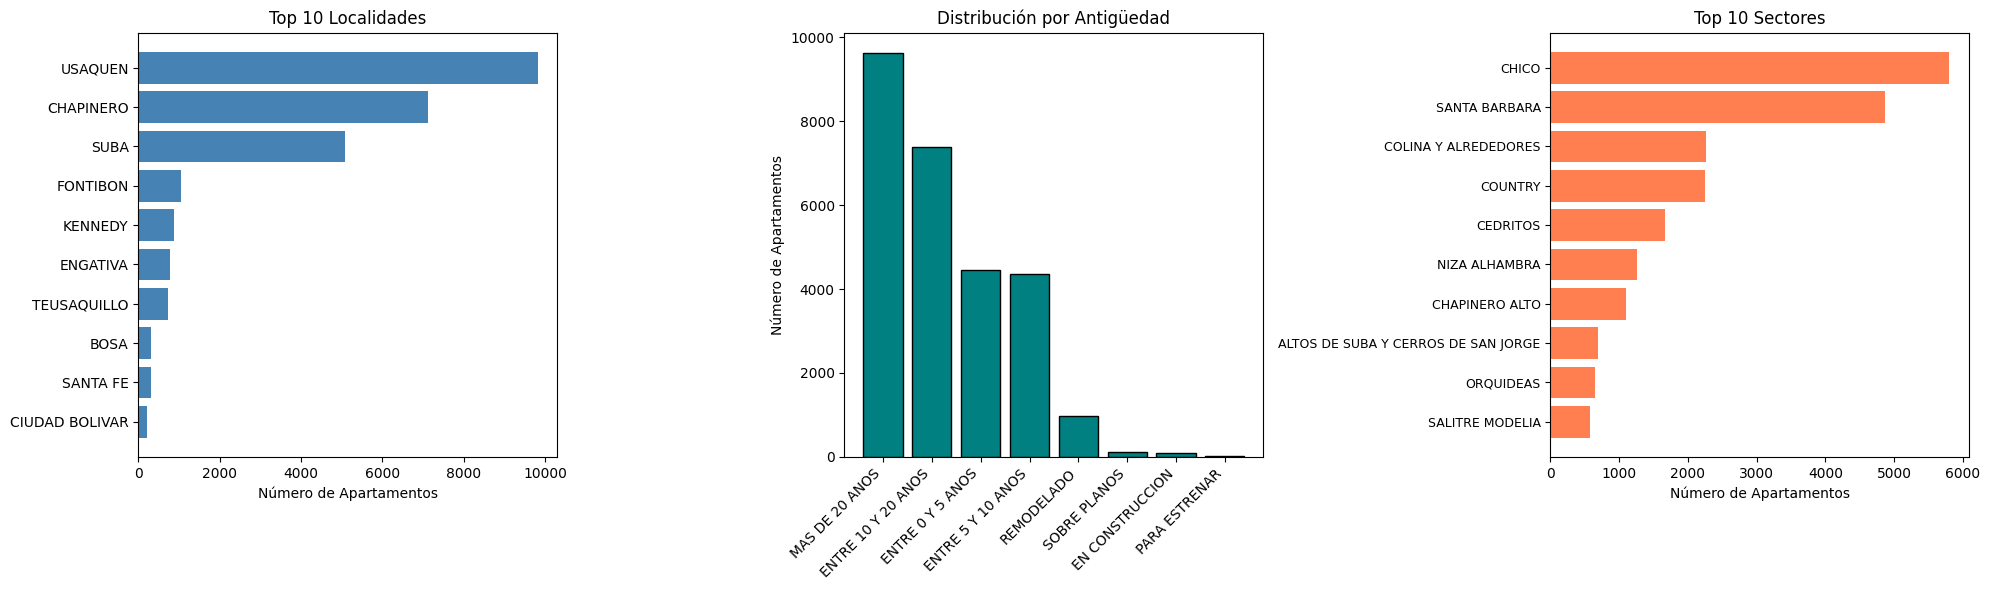

In [556]:
# Visualización de variables categóricas
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

df_plot = df_clean.copy()
# 1. Top 10 Localidades
localidad_top10 = df_plot['localidad'].value_counts().head(10)
axes[0].barh(range(len(localidad_top10)), localidad_top10.values, color='steelblue')
axes[0].set_yticks(range(len(localidad_top10)))
axes[0].set_yticklabels(localidad_top10.index)
axes[0].set_xlabel('Número de Apartamentos')
axes[0].set_title('Top 10 Localidades')
axes[0].invert_yaxis()

# 2. Antigüedad
antiguedad_counts = df_plot['antiguedad'].value_counts()
axes[1].bar(range(len(antiguedad_counts)), antiguedad_counts.values, color='teal', edgecolor='black')
axes[1].set_xticks(range(len(antiguedad_counts)))
axes[1].set_xticklabels(antiguedad_counts.index, rotation=45, ha='right')
axes[1].set_ylabel('Número de Apartamentos')
axes[1].set_title('Distribución por Antigüedad')

# 3. Top 10 Sectores
sector_top10 = df_plot['sector'].value_counts().head(10)
axes[2].barh(range(len(sector_top10)), sector_top10.values, color='coral')
axes[2].set_yticks(range(len(sector_top10)))
axes[2].set_yticklabels(sector_top10.index, fontsize=9)
axes[2].set_xlabel('Número de Apartamentos')
axes[2].set_title('Top 10 Sectores')
axes[2].invert_yaxis()

plt.tight_layout()
plt.show()

## **Análisis Multivariado**

#### Matriz de correlación

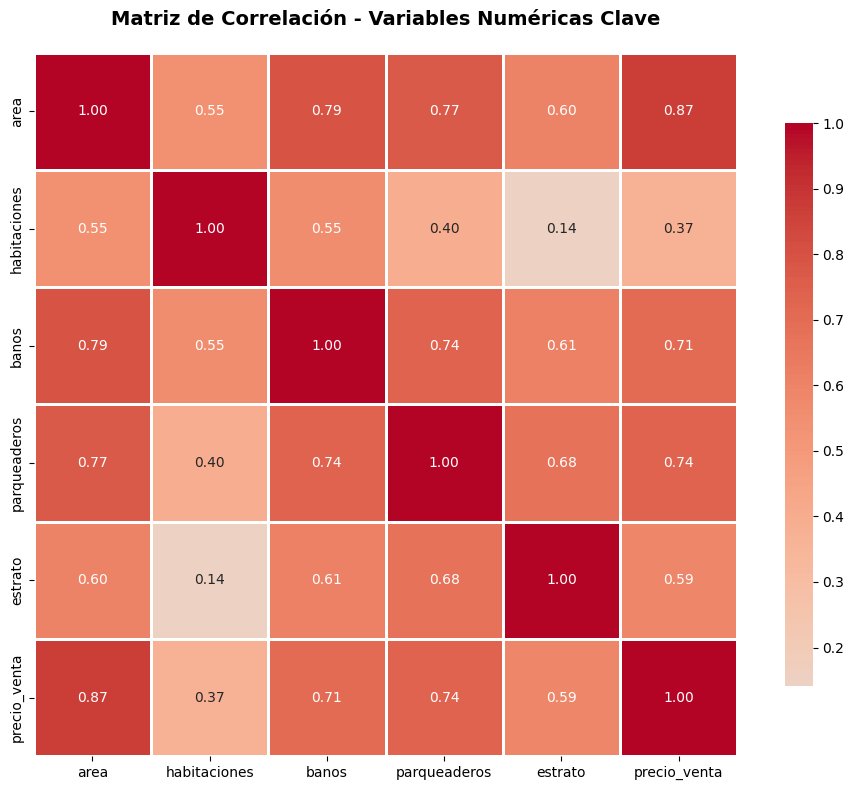

In [557]:
# Matriz de correlación para variables numéricas
vars_correlacion = ['area', 'habitaciones', 'banos', 'parqueaderos', 'estrato', 'precio_venta']
df_correlacion = df_clean[vars_correlacion].dropna()

corr_matrix = df_correlacion.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.2f')
plt.title('Matriz de Correlación - Variables Numéricas Clave', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

#### Precio de venta vs Estrato

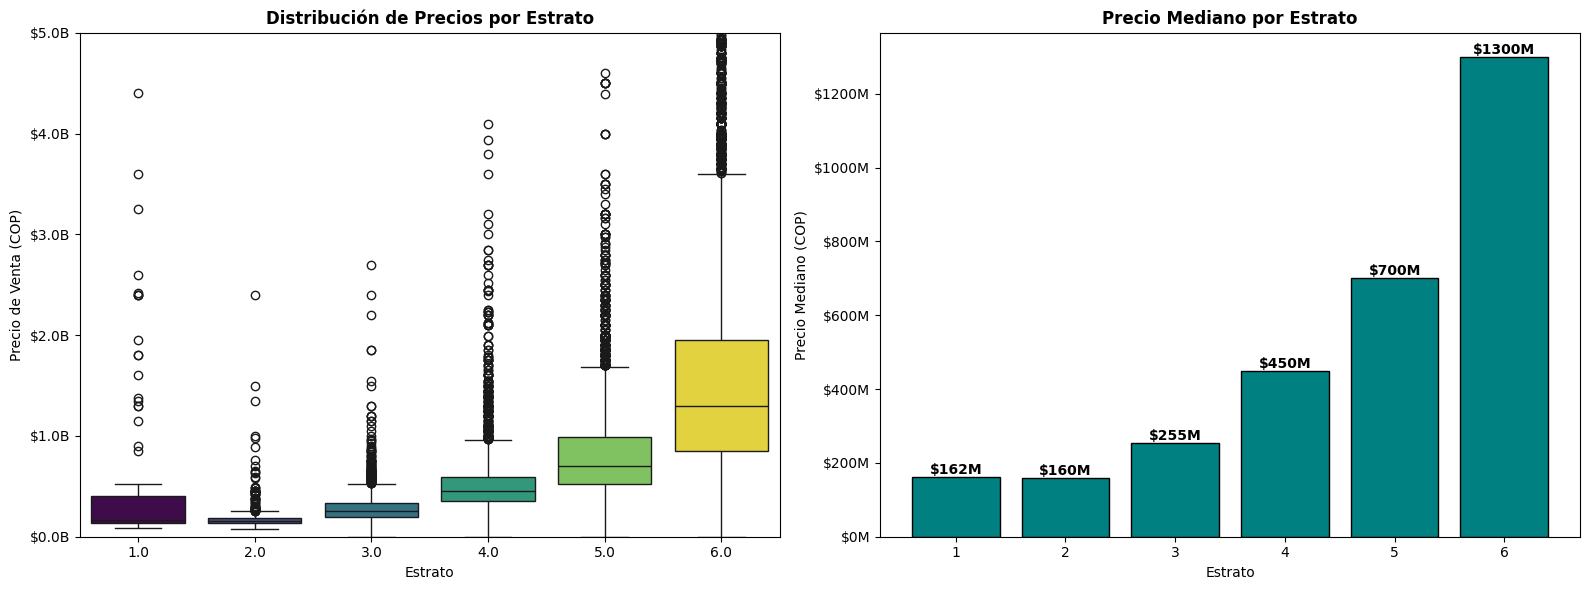

In [558]:
# Análisis de precio por estrato
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Boxplot de precio por estrato


sns.boxplot(data=df_clean, x='estrato', y='precio_venta', ax=axes[0], palette='viridis', hue = "estrato", legend=False)
axes[0].set_title('Distribución de Precios por Estrato', fontweight='bold')
axes[0].set_xlabel('Estrato')
axes[0].set_ylabel('Precio de Venta (COP)')
axes[0].set_ylim(0, 5e9)
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e9:.1f}B'))

# Gráfico 2: Precio promedio por estrato
precio_por_estrato = df_clean.groupby('estrato')['precio_venta'].median().sort_index()
axes[1].bar(precio_por_estrato.index, precio_por_estrato.values, color='teal', edgecolor='black')
axes[1].set_title('Precio Mediano por Estrato', fontweight='bold')
axes[1].set_xlabel('Estrato')
axes[1].set_ylabel('Precio Mediano (COP)')
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.0f}M'))

for i, (estrato, precio) in enumerate(precio_por_estrato.items()):
    axes[1].text(estrato, precio, f'${precio/1e6:.0f}M', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

#### Precio de venta vs Número de habitaciones

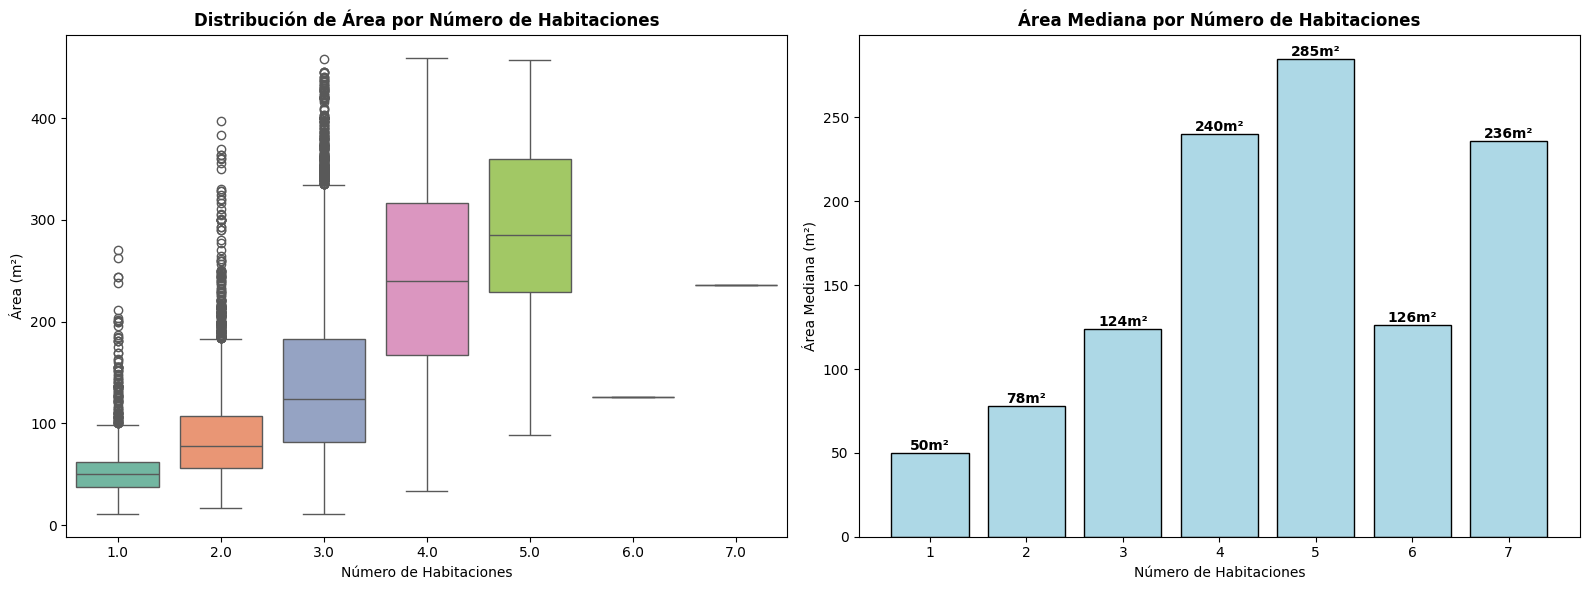

In [559]:
# Análisis de área por número de habitaciones
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Boxplot área por habitaciones

sns.boxplot(data=df_clean, x='habitaciones', y='area', ax=axes[0], palette='Set2', hue = "habitaciones", legend=False)
axes[0].set_title('Distribución de Área por Número de Habitaciones', fontweight='bold')
axes[0].set_xlabel('Número de Habitaciones')
axes[0].set_ylabel('Área (m²)')

# Gráfico 2: Área promedio por habitaciones
area_por_hab = df_clean.groupby('habitaciones')['area'].median().sort_index()
axes[1].bar(area_por_hab.index, area_por_hab.values, color='lightblue', edgecolor='black')
axes[1].set_title('Área Mediana por Número de Habitaciones', fontweight='bold')
axes[1].set_xlabel('Número de Habitaciones')
axes[1].set_ylabel('Área Mediana (m²)')

for i, (hab, area) in enumerate(area_por_hab.items()):
    axes[1].text(hab, area, f'{area:.0f}m²', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# **3. Modelado**

librerias necesarias para el modelado

In [560]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, root_mean_squared_error

## **3.1. Preparación de datos para el modelo**

En esta sección se preparan los datos para el entrenamiento del modelo de predicción de precios.

Se realizan las siguientes actividades:
- Limpieza de datos y manejo de valores nulos
- Selección de features
- División de datos en conjuntos y entrenamiento del modelo

In [561]:
features_selected = [
    'area', 'habitaciones', 'banos', 'parqueaderos', 
    'estrato', 'antiguedad', 'sector', 'localidad'
]

numeric_features = ['area', 'habitaciones', 'banos', 'parqueaderos', 
                    'estrato']

categorical_features = ['sector', 'localidad', 'antiguedad']

target_variable = 'precio_venta'

df_model = apartamentos_df[features_selected + [target_variable]].copy()

Revisando las variables de interés, tenemos que algunas tienen valores nulos. Procedemos a realizar la siguiente limpieza:

* `piso`: dado que la totalidad de sus filas cuentan con valores nulos, se elimina esta columna del análisis.
* `precio_venta`: Esta es la variable objetivo, por ende, al no poder usar valores nulos para el entrenamiento del modelo, se eliminan estas filas
* `sector`, `barrio`, `antiguedad`, `habitaciones`, `banos`, `estrato`, `parqueaderos`: Estas variables presentan valores nulos, sin embargo, al no ser una cantidad significativa, se procede a eliminar las filas que contienen estos valores nulos.

Adicionalmente, se eliminan los outliers extremos en el precio de venta y el área para mantener consistencia en el análisis.

In [562]:
def remove_outliers_iqr(df, col):
    """Elimina outliers en una columna usando el método IQR."""
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

In [563]:
# 1. Filtrar solo registros con precio_venta válido
df_model = df_model[df_model['precio_venta'].notna()].copy()

In [564]:

# 2. Eliminar outliers dinámicos en area y habitaciones
for col in ['area', 'habitaciones', 'parqueaderos', 'precio_venta']:
    df_model = remove_outliers_iqr(df_model, col)

# 3. Eliminar valores negativos, todas las columnas númericas seleccionadas deben ser >= 0 
for col in numeric_features + [target_variable]:
    df_model = df_model[df_model[col] >= 0]

# 4. Eliminar valores de cero en columnas númericas donde no tiene sentido
for col in ['area', 'estrato', "precio_venta"]:
    df_model = df_model[df_model[col] > 0]

# 4. Eliminar filas con valores nulos
df_model = df_model.dropna()

# 5. Eliminamos duplicados
df_model = df_model.drop_duplicates()

# 6. Transformar la variable objetivo usando log
df_model["precio_venta_log"] = np.log1p(df_model["precio_venta"])

df_model.shape

(20743, 10)

Se tiene entonces que el dataset reduce de 43013 a 19970 luego de realizar la limpieza

In [565]:

X = df_model[features_selected]
y = df_model['precio_venta_log']

Se establece un parámetro de reproducibilidad (random_state) para asegurar resultados consistentes.

In [566]:
seed = 42   

Se dividen los datos en conjuntos de entrenamiento (60%), validación (20%) y test (20%).

In [567]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.4,
    random_state=seed
)

X_val, X_test, y_val, y_test = train_test_split(
    X_test, y_test, test_size=0.5, random_state=seed
)

In [568]:
X_train[numeric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
area,12445.00,111.66,60.39,1.00,64.00,96.00,148.00,344.72
habitaciones,12445.00,2.63,0.74,1.00,2.00,3.00,3.00,4.00
banos,12445.00,2.59,1.04,0.00,2.00,2.00,3.00,5.00
parqueaderos,12445.00,1.49,0.85,0.00,1.00,2.00,2.00,3.00
estrato,12445.00,4.71,1.23,1.00,4.00,5.00,6.00,6.00


In [569]:
print("Distribución de la variable objetivo (precio_venta) en el conjunto de entrenamiento:")
np.expm1(y_train).describe()/1e6

Distribución de la variable objetivo (precio_venta) en el conjunto de entrenamiento:


count      0.01
mean     741.28
std      476.84
min        1.10
25%      370.00
50%      620.00
75%      990.00
max     2180.00
Name: precio_venta_log, dtype: float64

## **3.2 pipeline preprocesamiento**

In [570]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [571]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [572]:
def regression_metrics(y_true, y_pred, n_features: int = None):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    n = len(y_true)
    p = n_features  # por ejemplo X.shape[1]
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1) if n_features is not None else None

    metrics = {
        'MAE': mae.__format__(",.0f"),
        'RMSE': rmse.__format__(",.0f"),
        'R²': round(r2, 4),
        'Adj R²': round(r2_adj, 4) if r2_adj is not None else None,
        'MAPE': round(mape, 4)
    }


    print(f"MAE:   ${mae:,.0f} COP")
    print(f"RMSE:  ${rmse:,.0f} COP")
    print(f"R²:    {r2:.4f}")

    return metrics

## **Modelo 1: Random Forest Regressor**

In [573]:
model = RandomForestRegressor(
    n_estimators=300,
    criterion='absolute_error',
    max_depth=None,
    min_samples_split=2,
    random_state=seed,
    n_jobs=-1
)

regressor = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

##### Entrenamiento (modelo base)

In [574]:
regressor.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [575]:

y_train_pred = regressor.predict(X_train)

In [576]:
# metricas en el set de entrenamiento
y_pred_train_real = np.expm1(y_train_pred)
y_train_real = np.expm1(y_train)
rf_train_metrics = regression_metrics(y_train_real, y_pred_train_real, n_features=X_train.shape[1])

MAE:   $49,814,202 COP
RMSE:  $94,743,206 COP
R²:    0.9605


#### Busqueda de hiperparámetros con GridSearchCV

In [577]:
param_grid = {
    'model__n_estimators': [200, 300, 350],
    'model__max_depth': [None, 8],
    "model__criterion": ["squared_error", "absolute_error"],
    "model__min_samples_split": [2, 4]
}

grid_search = GridSearchCV(
    estimator=regressor,
    param_grid=param_grid,
    cv=2,                      
    n_jobs=-1,
    verbose=2,
    scoring='neg_root_mean_squared_error'
)

In [578]:
grid_search.fit(X_val, y_val)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'model__criterion': ['squared_error', 'absolute_error'], 'model__max_depth': [None, 8], 'model__min_samples_split': [2, 4], 'model__n_estimators': [200, 300, ...]}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,2
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


Vemos los resultados del Grid Search

In [579]:
df_grid_search = pd.DataFrame(grid_search.cv_results_)
df_grid_search
params_columns = [col for col in df_grid_search.columns if col.startswith('param_')]
columns_df_grid_search = [ "rank_test_score", "mean_test_score", "std_test_score"] + params_columns
df_grid_search[columns_df_grid_search].sort_values("rank_test_score")

,rank_test_score,mean_test_score,std_test_score,param_model__criterion,param_model__max_depth,param_model__min_samples_split,param_model__n_estimators
19,1,-0.40,0.09,absolute_error,8,2,300
20,2,-0.40,0.09,absolute_error,8,2,350
18,3,-0.40,0.09,absolute_error,8,2,200
22,4,-0.40,0.09,absolute_error,8,4,300
23,5,-0.40,0.09,absolute_error,8,4,350
21,6,-0.40,0.09,absolute_error,8,4,200
17,7,-0.41,0.08,absolute_error,None,4,350
16,8,-0.41,0.08,absolute_error,None,4,300
15,9,-0.41,0.08,absolute_error,None,4,200
14,10,-0.41,0.08,absolute_error,None,2,350


El mejor modelo encontrado

In [580]:
rf_best_model = grid_search.best_estimator_
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'model__criterion': 'absolute_error', 'model__max_depth': 8, 'model__min_samples_split': 2, 'model__n_estimators': 300}


#### Métricas sobre el conjunto de prueba

Finalmente, evaluamos el mejor modelo en el conjunto de prueba y calculamos las métricas de regresión.

In [581]:
y_pred_log = rf_best_model.predict(X_test)
y_pred_real_rf = np.expm1(y_pred_log)
y_test_true = np.expm1(y_test)


rf_test_metrics = regression_metrics(y_test_true, y_pred_real_rf, n_features=X_test.shape[1])

MAE:   $117,873,838 COP
RMSE:  $193,264,685 COP
R²:    0.8350


Revisamos las importancias de las características del modelo Random Forest.

In [582]:
rf_estimator = rf_best_model.named_steps["model"]

onehot_names = (
    rf_best_model.named_steps["preprocessor"]
    .named_transformers_["cat"]
    .named_steps["onehot"]
    .get_feature_names_out(categorical_features)
)

feature_names = numeric_features + list(onehot_names)

feat_imp = (
    pd.Series(rf_estimator.feature_importances_, index=feature_names)
      .sort_values(ascending=False)
)

feat_imp.round(2)

area                          0.68
estrato                       0.16
parqueaderos                  0.03
antiguedad_MAS DE 20 ANOS     0.02
antiguedad_ENTRE 0 Y 5 ANOS   0.02
                              ... 
sector_RESTREPO               0.00
sector_SANTA ISABEL           0.00
sector_SOSIEGO                0.00
sector_VENECIA                0.00
sector_ZONA FRANCA            0.00
Length: 107, dtype: float64

## **Modelo 2: XGBoost Regressor**

In [583]:
from xgboost import XGBRegressor

In [584]:
model_xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

regressor_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model_xgb)
])
regressor_xgb

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


#### Entrenamiento (modelo base)

In [585]:
regressor_xgb.fit(X_train, y_train)

y_pred_log_xgb = regressor_xgb.predict(X_train)
y_pred_train_real_xgb = np.expm1(y_pred_log_xgb)
y_train_real_xgb = np.expm1(y_train)

xg_train_metrics = regression_metrics(y_train_real_xgb, y_pred_train_real_xgb, n_features=X_train.shape[1])

MAE:   $93,563,949 COP
RMSE:  $153,086,663 COP
R²:    0.8969


#### Búsqueda de hiperparámetros con GridSearchCV

In [586]:
param_grid_xgb = {
    'model__max_depth': [None, 4, 8],
    'model__n_estimators': [200, 300, 350],
    'model__learning_rate': [0.05, 0.1]
}

grid_search_xgb = GridSearchCV(
    estimator=regressor_xgb,
    param_grid=param_grid_xgb,
    cv=2,
    n_jobs=-1,
    verbose=2,
    scoring='neg_root_mean_squared_error',
)
grid_search_xgb.fit(X_val, y_val)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


,estimator,"Pipeline(step...=None, ...))])"
,param_grid,"{'model__learning_rate': [0.05, 0.1], 'model__max_depth': [None, 4, ...], 'model__n_estimators': [200, 300, ...]}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,2
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [587]:
df_grid_search = pd.DataFrame(grid_search_xgb.cv_results_)
params_columns = [col for col in df_grid_search.columns if col.startswith('param_')]
columns_df_grid_search = [ "rank_test_score", "mean_test_score", "std_test_score"] + params_columns
df_grid_search[columns_df_grid_search].sort_values("rank_test_score")

,rank_test_score,mean_test_score,std_test_score,param_model__learning_rate,param_model__max_depth,param_model__n_estimators
3,1,-0.41,0.06,0.05,4,200
4,2,-0.42,0.06,0.05,4,300
5,3,-0.42,0.06,0.05,4,350
12,4,-0.42,0.05,0.10,4,200
13,5,-0.43,0.05,0.10,4,300
14,6,-0.43,0.05,0.10,4,350
0,7,-0.43,0.04,0.05,None,200
9,8,-0.44,0.04,0.10,None,200
1,9,-0.45,0.03,0.05,None,300
10,10,-0.45,0.03,0.10,None,300


In [588]:
print("Mejores parámetros:", grid_search_xgb.best_params_)

xgb_best_model = grid_search_xgb.best_estimator_
xgb_best_model

Mejores parámetros: {'model__learning_rate': 0.05, 'model__max_depth': 4, 'model__n_estimators': 200}


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


#### Métricas sobre el conjunto de prueba

In [589]:
y_pred_log_xgb = xgb_best_model.predict(X_test)

y_test_true = np.expm1(y_test)
y_pred_real_xgb = np.expm1(y_pred_log_xgb)

xgb_test_metrics = regression_metrics(y_test_true, y_pred_real_xgb, n_features=X_test.shape[1])

MAE:   $120,763,679 COP
RMSE:  $202,673,275 COP
R²:    0.8185


In [590]:

xgb_estimator = xgb_best_model.named_steps["model"]

onehot_names = (
    xgb_best_model.named_steps["preprocessor"]
    .named_transformers_["cat"]
    .named_steps["onehot"]
    .get_feature_names_out(categorical_features)
)

feature_names = numeric_features + list(onehot_names)

feat_imp = (
    pd.Series(xgb_estimator.feature_importances_, index=feature_names)
      .sort_values(ascending=False)
)

feat_imp.round(2)

area                          0.19
sector_CENTRO INTERNACIONAL   0.14
estrato                       0.12
parqueaderos                  0.10
sector_CHAPINERO ALTO         0.06
                              ... 
sector_TOBERIN                0.00
localidad_TUNJUELITO          0.00
localidad_SAN CRISTOBAL       0.00
antiguedad_PARA ESTRENAR      0.00
antiguedad_SOBRE PLANOS       0.00
Length: 107, dtype: float32

## **Comparación de modelos**

### --- Métricas de regresión ---

In [591]:
metrics_comparison = pd.DataFrame({
    'Random Forest': rf_test_metrics,
    'XGBoost': xgb_test_metrics
})

metrics_comparison 

,Random Forest,XGBoost
MAE,"117,873,838","120,763,679"
RMSE,"193,264,685","202,673,275"
R²,0.83,0.82
Adj R²,0.83,0.82
MAPE,1.63,1.57


### --- Comparar la distribución de valores reales y valores predichos ---

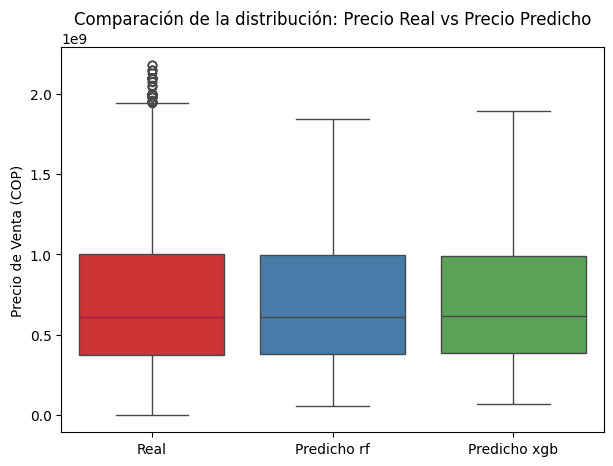

In [592]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

datos_comparacion = pd.DataFrame({
    'Real': y_test_true,
    'Predicho rf': y_pred_real_rf,
    'Predicho xgb': y_pred_real_xgb
})
data_long = pd.melt(datos_comparacion, var_name='Tipo', value_name='Precio de Venta (COP)')

plt.figure(figsize=(7,5))
sns.boxplot(x='Tipo', y='Precio de Venta (COP)', data=data_long, palette='Set1', hue = "Tipo")
plt.title('Comparación de la distribución: Precio Real vs Precio Predicho')
plt.ylabel('Precio de Venta (COP)')
plt.xlabel('')
plt.show()

In [593]:
print("Descripción estadística de los valores reales y predichos (en millones de COP):")
print(datos_comparacion.describe().round(2)/1e6)

Descripción estadística de los valores reales y predichos (en millones de COP):
         Real  Predicho rf  Predicho xgb
count    0.00         0.00          0.00
mean   741.93       718.16        707.46
std    475.83       419.90        406.16
min      1.00        54.77         66.19
25%    372.20       378.17        386.61
50%    610.00       606.74        615.58
75%   1000.00       997.74        990.07
max   2180.00      1843.85       1891.77


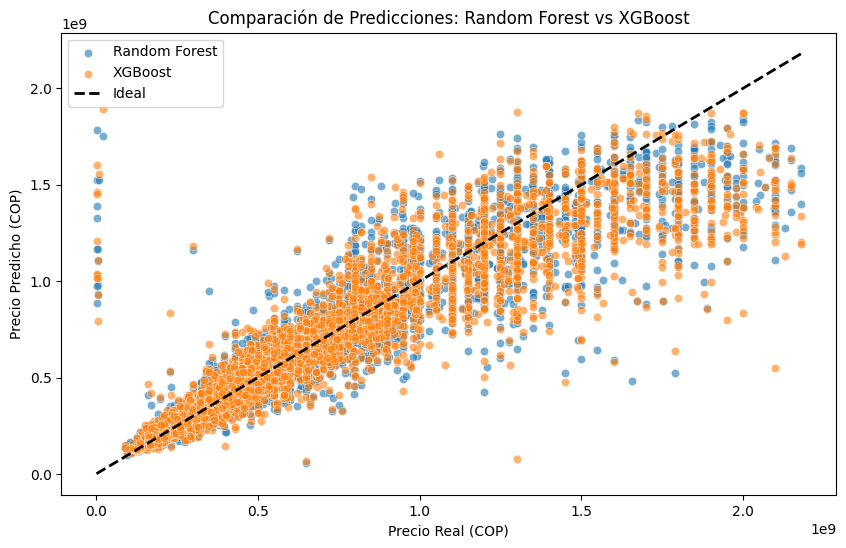

In [594]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_true, y=y_pred_real_rf, label='Random Forest', alpha=0.6)
sns.scatterplot(x=y_test_true, y=y_pred_real_xgb, label='XGBoost', alpha=0.6)
plt.plot([y_test_true.min(), y_test_true.max()], [y_test_true.min(), y_test_true.max()], 'k--', lw=2, label='Ideal')
plt.xlabel('Precio Real (COP)')
plt.ylabel('Precio Predicho (COP)')
plt.title('Comparación de Predicciones: Random Forest vs XGBoost')
plt.legend()
plt.show()

### ---- Comparación de residuos de los dos modelos ----


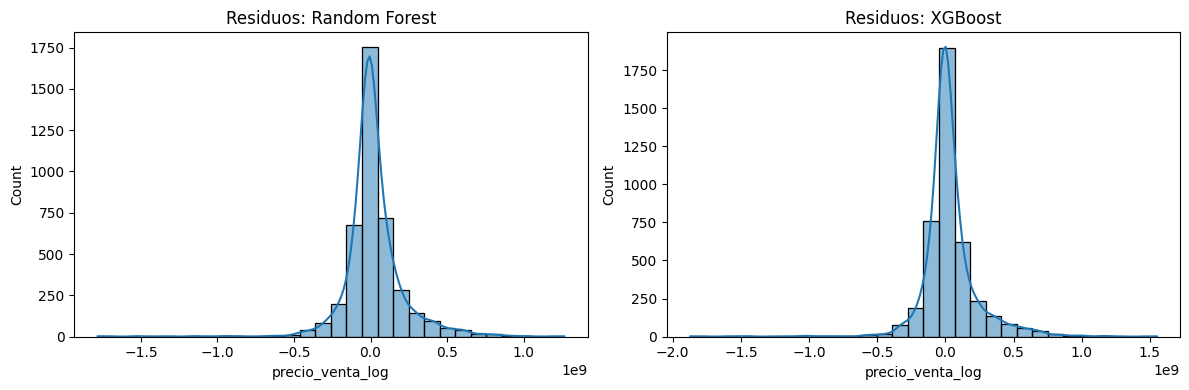

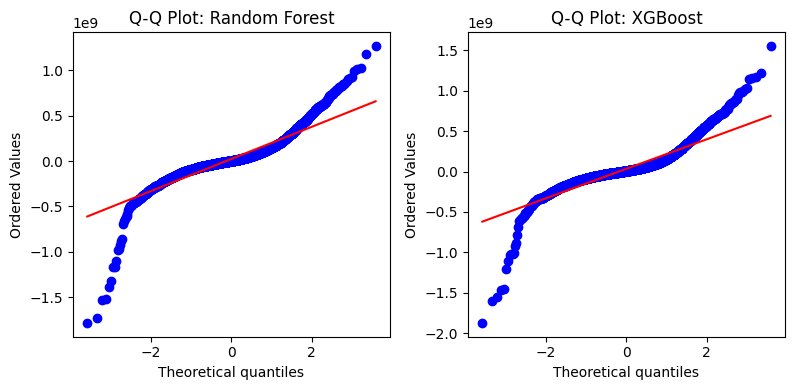

In [595]:
residuos_m1 = y_test_true - y_pred_real_rf
residuos_m2 = y_test_true - y_pred_real_xgb

plt.figure(figsize=(12,4))
for i, (res, modelo) in enumerate(zip(
    [residuos_m1, residuos_m2],
    ['Random Forest', 'XGBoost'])):
    plt.subplot(1,2,i+1)
    sns.histplot(res, bins=30, kde=True)
    plt.title(f'Residuos: {modelo}')
plt.tight_layout()
plt.show()

# Q-Q plots
import scipy.stats as stats
plt.figure(figsize=(12,4))
for i, (res, modelo) in enumerate(zip(
    [residuos_m1, residuos_m2],
    ['Random Forest', 'XGBoost'])):
    plt.subplot(1,3,i+1)
    stats.probplot(res, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot: {modelo}')
plt.tight_layout()
plt.show()

# 4. Interpretabilidad

In [596]:
import shap
import lime
import lime.lime_tabular

In [597]:
median_price = y_test_real.median()

median_idx = (y_test_real - median_price).abs().idxmin()
minimum_idx = y_test_real.idxmin()
maximum_idx = y_test_real.idxmax()

indices = [minimum_idx, median_idx, maximum_idx]

print("Seleccionando apartamentos para explicar:")
for i, idx in enumerate(indices):
    actual_price = y_test_real.loc[idx]
    print(f"{i+1}. Apartamento (índice {idx}): Precio real = ${actual_price:,.0f} COP")


Seleccionando apartamentos para explicar:
1. Apartamento (índice 37696): Precio real = $1,000,000 COP
2. Apartamento (índice 29751): Precio real = $610,000,000 COP
3. Apartamento (índice 42210): Precio real = $2,180,000,000 COP


### LIME

In [598]:
X_train_transformed = rf_best_model.named_steps['preprocessor'].transform(X_train)

# Get feature names after preprocessing
feature_names_lime = (
    numeric_features + 
    list(rf_best_model.named_steps['preprocessor']
         .named_transformers_['cat']
         .named_steps['onehot']
         .get_feature_names_out(categorical_features))
)

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_transformed,
    feature_names=feature_names_lime,
    class_names=['precio_venta'],
    mode='regression'
)

In [599]:
# Create a prediction function for LIME
# Since we're passing preprocessed data, we only need the model step
def predict_fn(X_preprocessed):
    """
    Prediction function for LIME that works with already preprocessed data
    """
    return rf_best_model.named_steps['model'].predict(X_preprocessed)

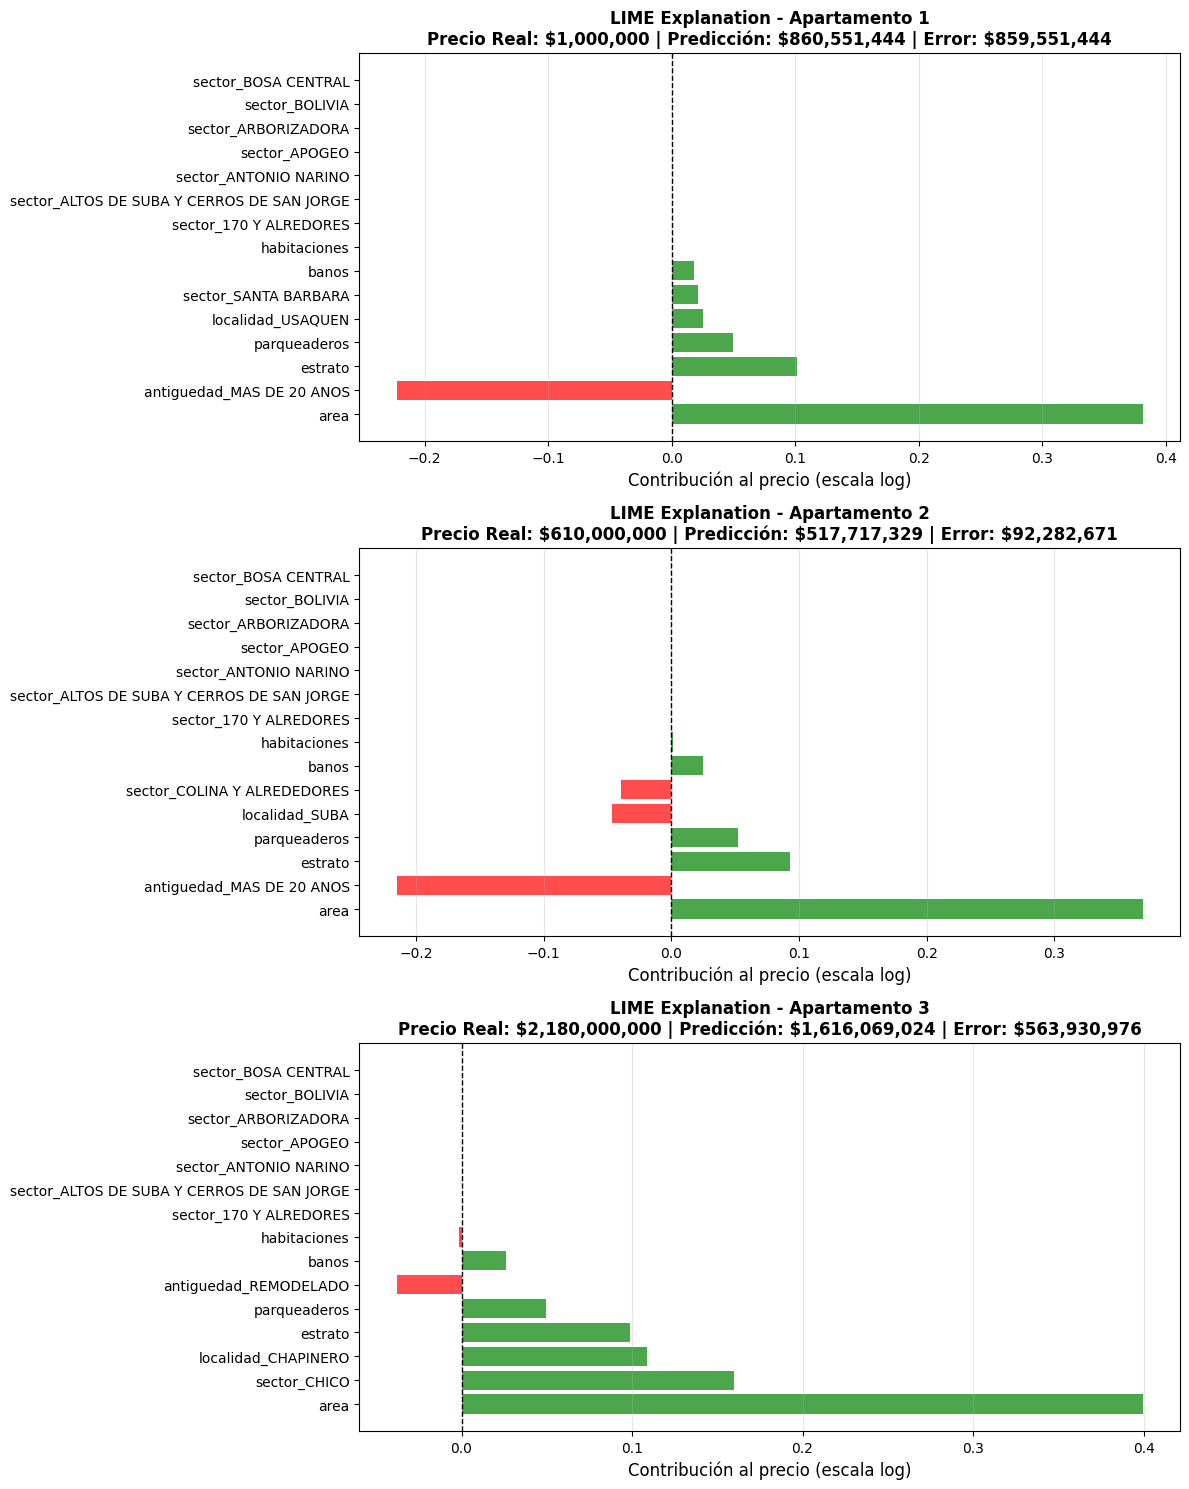

In [600]:
X_test_transformed_lime = rf_best_model.named_steps['preprocessor'].transform(X_test)

# Generate LIME explanations for the selected instances
fig, axes = plt.subplots(len(indices), 1, figsize=(12, 5*len(indices)))
if len(indices) == 1:
    axes = [axes]
    
for idx_plot, idx in enumerate(indices):
    position = X_test.index.get_loc(idx)
    
    instance_transformed = X_test_transformed_lime[position]
    
    exp = explainer.explain_instance(
        data_row=instance_transformed,
        predict_fn=predict_fn,
        num_features=15
    )
    
    actual_price = y_test_real.loc[idx]
    instance_original = X_test.loc[[idx]]
    predicted_log = best_model.predict(instance_original)[0]
    predicted_price = np.expm1(predicted_log)
    
    lime_values = exp.as_list()
    features = [item[0] for item in lime_values]
    importances = [item[1] for item in lime_values]
    
    colors = ['green' if x > 0 else 'red' for x in importances]
    
    axes[idx_plot].barh(features, importances, color=colors, alpha=0.7)
    axes[idx_plot].set_xlabel('Contribución al precio (escala log)', fontsize=12)
    axes[idx_plot].set_title(
        f'LIME Explanation - Apartamento {idx_plot+1}\n'
        f'Precio Real: ${actual_price:,.0f} | Predicción: ${predicted_price:,.0f} | Error: ${abs(actual_price-predicted_price):,.0f}',
        fontsize=12, fontweight='bold'
    )
    axes[idx_plot].axvline(x=0, color='black', linestyle='--', linewidth=1)
    axes[idx_plot].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


### SHAP (SHapley Additive exPlanations)

In [601]:
trained_model = rf_best_model.named_steps['model']

X_test_transformed = rf_best_model.named_steps['preprocessor'].transform(X_test)

if hasattr(X_test_transformed, 'toarray'):
    X_test_transformed = X_test_transformed.toarray()

explainer_shap = shap.TreeExplainer(trained_model)

sample_size = min(10, X_test_transformed.shape[0])
shap_values = explainer_shap.shap_values(X_test_transformed[:sample_size])

print(f"Calculated SHAP values for {sample_size} test samples")
print(f"SHAP values shape: {shap_values.shape}")

Calculated SHAP values for 10 test samples
SHAP values shape: (10, 107)


In [602]:
feature_names = (
    numeric_features + 
    list(rf_best_model.named_steps['preprocessor']
         .named_transformers_['cat']
         .named_steps['onehot']
         .get_feature_names_out(categorical_features))
)

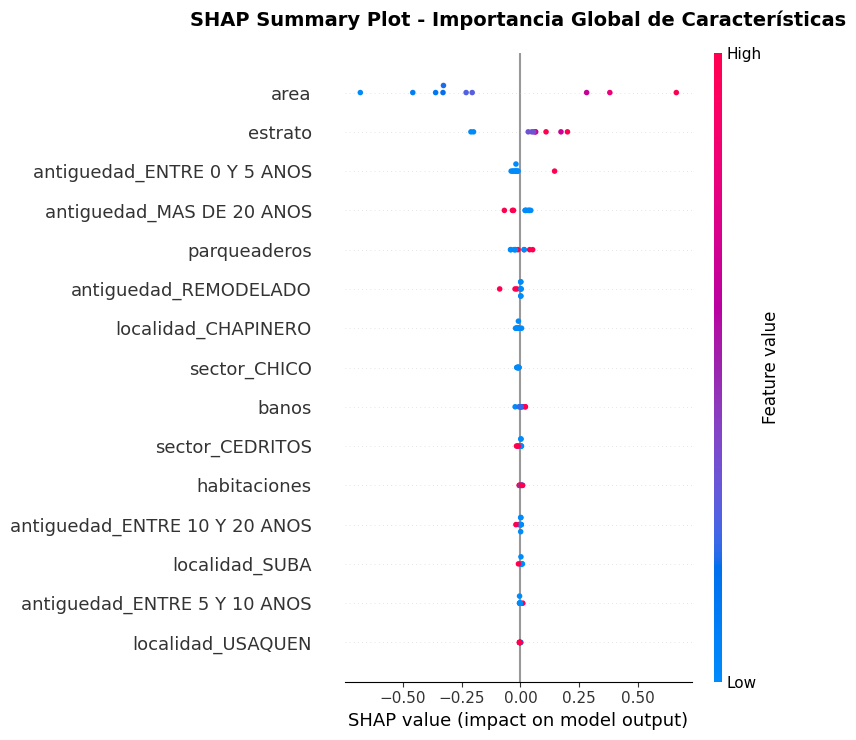

In [603]:
# SHAP Summary Plot - Shows feature importance across all predictions
plt.figure(figsize=(12, 8))
shap.summary_plot(
    shap_values[:sample_size], 
    X_test_transformed[:sample_size],
    feature_names=feature_names,
    max_display=15,
    show=False
)
plt.title('SHAP Summary Plot - Importancia Global de Características', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


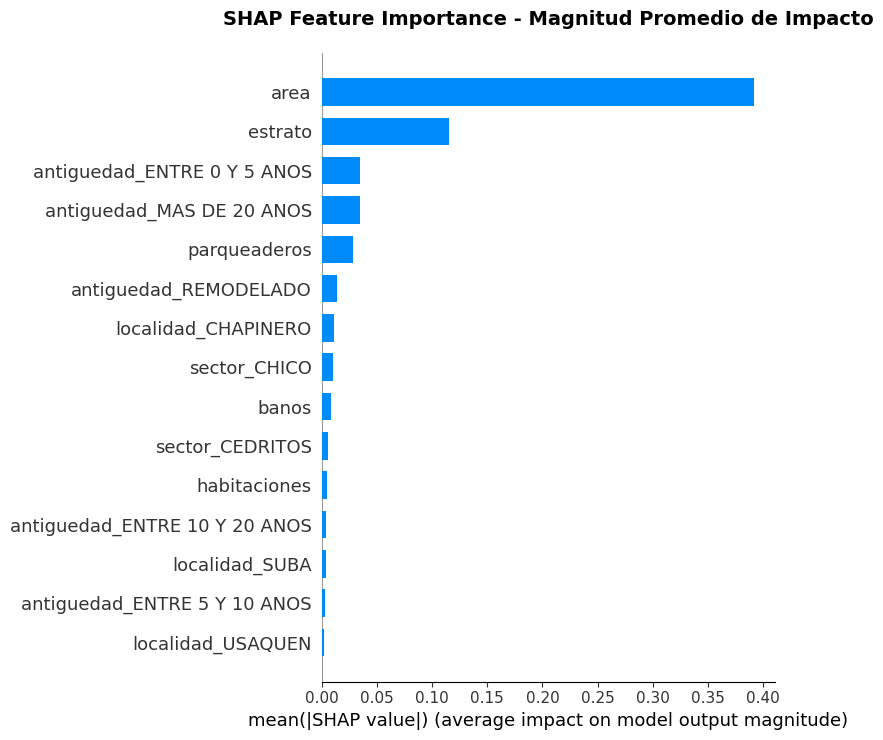

In [604]:
# SHAP Bar Plot - Average importance
plt.figure(figsize=(10, 6))
shap.summary_plot(
    shap_values[:sample_size], 
    X_test_transformed[:sample_size],
    feature_names=feature_names,
    plot_type="bar",
    max_display=15,
    show=False
)
plt.title('SHAP Feature Importance - Magnitud Promedio de Impacto', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


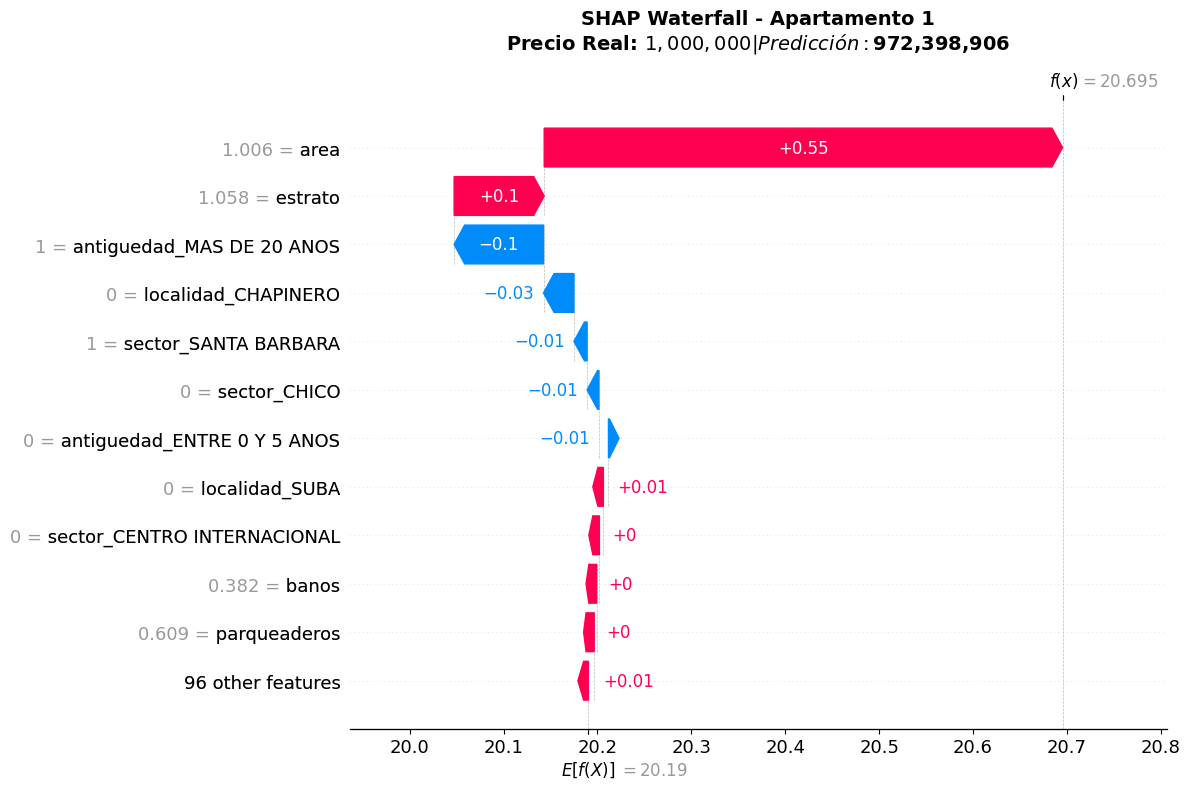

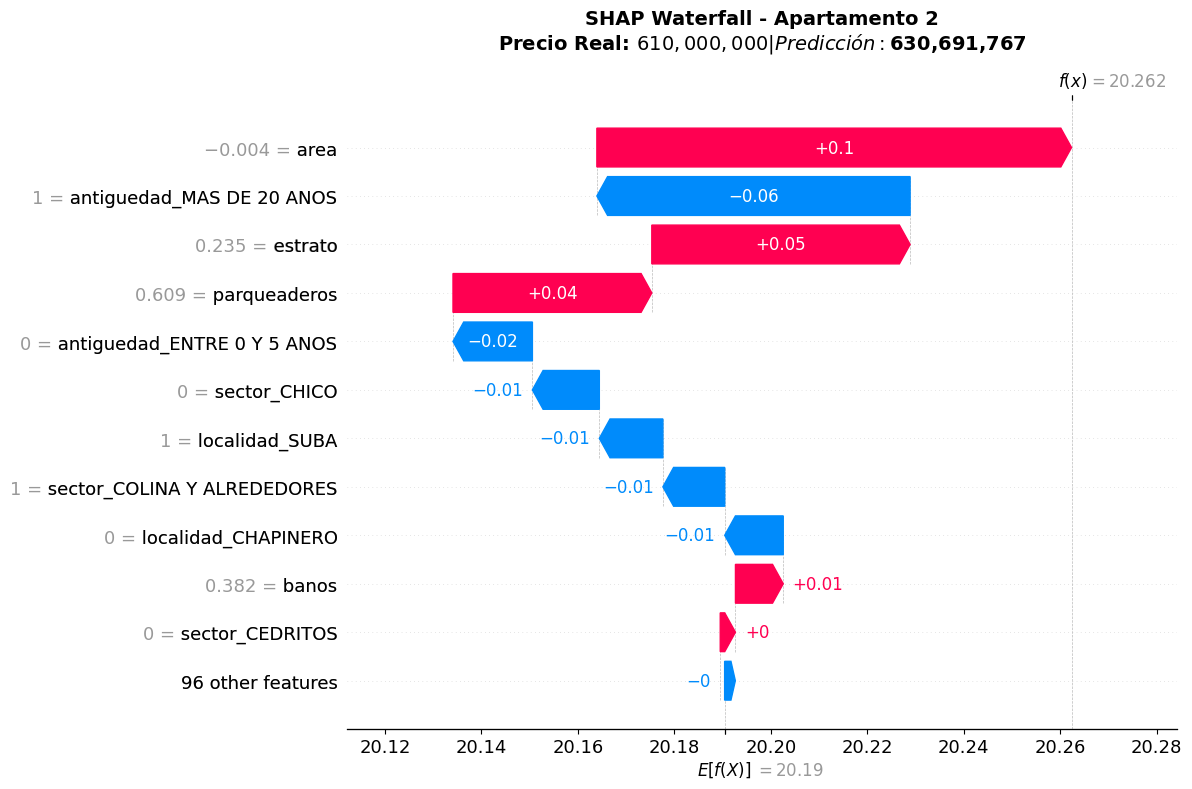

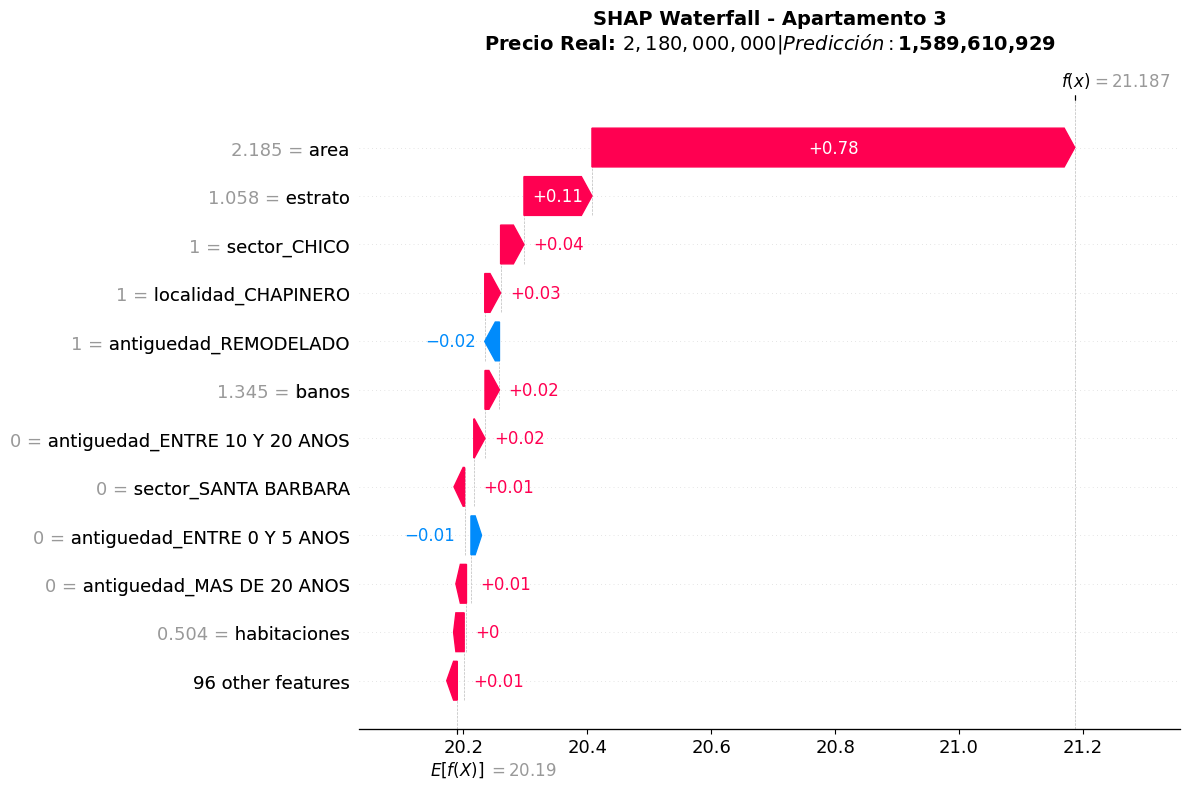

In [605]:
for idx_plot, idx in enumerate(indices):
    plt.figure(figsize=(12, 8))

    position = X_test.index.get_loc(idx)
    
    instance_transformed = X_test_transformed[position]
    shap_values_instance = (
        shap_values[position] 
        if position < sample_size 
        else explainer_shap.shap_values(instance_transformed.reshape(1, -1))[0]
    )
    
    actual_price = y_test_real.loc[idx]
    predicted_log = rf_best_model.predict(X_test.loc[[idx]])[0]
    predicted_price = np.expm1(predicted_log)
    
    explanation = shap.Explanation(
        values=shap_values_instance,
        base_values=explainer_shap.expected_value,
        data=instance_transformed,
        feature_names=feature_names
    )
    
    shap.plots.waterfall(
        explanation, 
        max_display=12,
        show=False
    )

    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    plt.title(
        f'SHAP Waterfall - Apartamento {idx_plot+1}\n'
        f'Precio Real: ${actual_price:,.0f} | Predicción: ${predicted_price:,.0f}',
        fontsize=14,
        fontweight='bold',
        pad=15
    )

    plt.tight_layout()
    plt.show()